<a href="https://colab.research.google.com/github/KevinFiorentino/JupyterNotebook/blob/master/Jupyter_Wines_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Preparación del Entorno

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [0]:
!wget -O wine.csv "https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs"

--2019-05-26 19:59:53--  https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs
Resolving drive.google.com (drive.google.com)... 74.125.141.138, 74.125.141.113, 74.125.141.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ko8hccohsnegibfurs6s162r51gssb2i/1558893600000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download [following]
--2019-05-26 19:59:54--  https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ko8hccohsnegibfurs6s162r51gssb2i/1558893600000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download
Resolving doc-0s-as-docs.googleusercontent.com (doc-0s-as-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-0s-as-docs.googleusercontent.com (doc-0s

# Prototipo I - Kevin - Wines

## 1) Entendimiento del Negocio

###Input variables (based on physicochemical tests):
   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4. residual sugar
   5. chlorides
   6. free sulfur dioxide
   7. total sulfur dioxide
   8. density
   9. pH
   10. sulphates
   11. alcohol
   12. wine type


### Output variable (based on sensory data): 
   13. quality (score between 0 and 10)
   
   ----
   
### Webgrafía:
   
- https://www.youtube.com/watch?v=GuW0Doiye8g

- https://napsterinblue.github.io/notes/machine_learning/model_selection/grid_search/

## 2) Entendimiento de los Datos

In [0]:
data = pd.read_csv('wine.csv', sep=',', index_col=0)
wines = pd.DataFrame(data)

In [0]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,8.5,0.655,0.49,6.10,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5,red
1,6.7,0.470,0.29,4.75,0.034,29.0,134.0,0.99056,3.29,0.46,13.0,7,White
2,5.8,0.190,0.24,1.30,0.044,38.0,128.0,0.99362,3.77,0.60,10.6,5,White
3,6.5,0.200,0.50,18.10,0.054,50.0,221.0,0.99941,2.94,0.64,8.8,6,White
4,5.6,0.605,0.05,2.40,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,5,red


In [0]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213854,0.338667,0.318628,5.469983,0.056053,30.733019,115.941409,0.994686,3.217333,0.529529,10.493907,5.818164
std,1.287939,0.164251,0.146342,4.715483,0.035773,17.571323,56.604841,0.002933,0.159624,0.148697,1.194671,0.873126
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992370,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.200000,0.064000,42.000000,156.000000,0.996960,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [0]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 13 columns):
fixed acidity           5197 non-null float64
volatile acidity        5197 non-null float64
citric acid             5197 non-null float64
residual sugar          5197 non-null float64
chlorides               5197 non-null float64
free sulfur dioxide     5197 non-null float64
total sulfur dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
type                    5197 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 568.4+ KB


In [0]:
print("Valores nulos en wines dataset:\n{}".format(wines.isnull().sum()))

Valores nulos en wines dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [0]:
#Convertimos 'type' en numérico para un mejor análisis
wines.type = wines.type.replace({"White":1, "red" : 0})

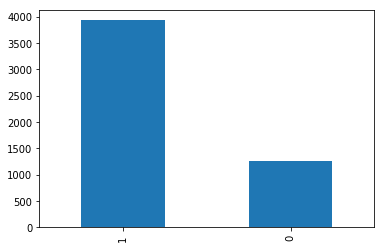

In [0]:
#Cantidad de vinos de cada tipo
wines['type'].value_counts().plot.bar()

In [0]:
nameCols = wines.columns.tolist()
#Quitamos 'type' por ser un string
nameCols.pop()
print(nameCols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


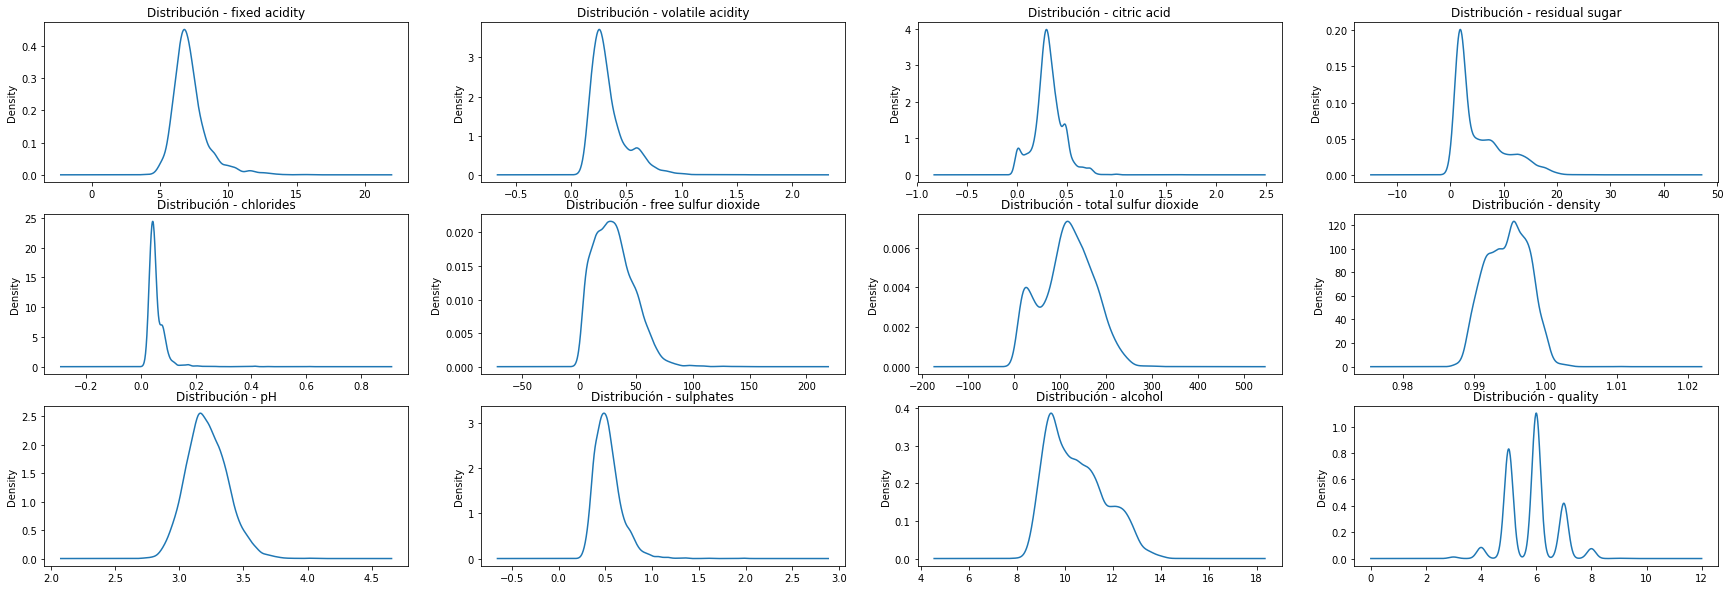

In [0]:
#Densidad de las variables
fig = plt.figure(figsize=(30,10))

x = 0
y = 0

for c in nameCols:
  plt.subplot2grid((3,4),(x,y))
  wines[c].plot.kde()
  plt.title('Distribución - ' + c)
  y += 1
  if y == 4:
    y = 0
    x += 1
    
plt.show()

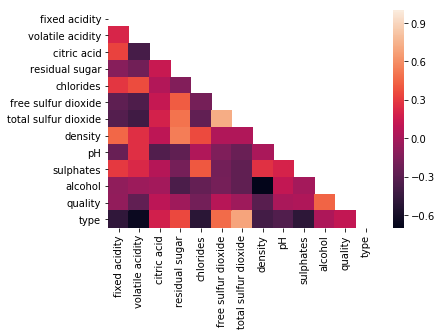

In [0]:
#Correlación entre variables
corr = wines.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, square=False, mask=mask)
plt.show()

## 3) Modelado

- **Predecir tipo de vino**

## 4) Preparación de los Datos

- **Volvemos a crear el DataFrame**

In [0]:
data = pd.read_csv('wine.csv', sep=',', index_col=0)
wines = pd.DataFrame(data)

wines.type = wines.type.replace({"White":1, "red" : 0})

#### 4.1) Split dataset

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
test_size = 0.3
RANDOM_STATE = 12

X = wines.drop(['quality'], axis=1)
y = wines['quality']
X_names = wines.dtypes.index.drop(['type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)

In [0]:
print("train: {} vs test {}".format(len(X_train), len(X_test)))

train: 3637 vs test 1560


## 5) Implementación

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=12)
rfc.fit(X_train, y_train)
y_predRFC = rfc.predict(X_test)

In [0]:
MSE_RFC = accuracy_score(y_test, y_predRFC)
print('accuracy = {}' . format(MSE_RFC))

accuracy = 0.5147435897435897


### Support Vector Classifier

In [0]:
from sklearn.svm import SVC

In [0]:
svc = SVC()
svc.fit(X_train, y_train)
y_predSVC = svc.predict(X_test)

In [0]:
MSE_SVC = accuracy_score(y_test, y_predSVC)
print('accuracy = {}' . format(MSE_SVC))

accuracy = 0.5198717948717949


## 5.1) Pipelines & GridSearchCV

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

cv = 10
n_jobs = -1 #Cantidad de procesadores. -1 utiliza todos los posibles.
verbose = 2

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### PipeGS - Random Forest Classifier

In [0]:
#RandomForestClassifier
pipelineRFC = Pipeline([
    ('scl', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])

pipelineRFC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
pipelineRFC.score(X_train, y_train)

0.9846026945284575

In [0]:
paramGridRFC = {
    'RandomForestClassifier__n_estimators' : (10, 15, 20, 100),
    'RandomForestClassifier__max_depth' : (None, 3, 5, 10),
    'RandomForestClassifier__min_samples_split' : (2, 3, 4),
}

gridSearchRFC = GridSearchCV(
    estimator = pipelineRFC,
    param_grid = paramGridRFC,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchRFC.fit(X_train, y_train)
print('Best Score: %s' % gridSearchRFC.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.2min finished


Best Score: 0.6508111080560902


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchRFC.best_estimator_.get_params()
for param_name in sorted(paramGridRFC.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
RandomForestClassifier__max_depth: None
RandomForestClassifier__min_samples_split: 2
RandomForestClassifier__n_estimators: 100


In [0]:
#Predecimos para luego aplicar accuracy_score()
predGS_RFC = gridSearchRFC.predict(X_test)

In [0]:
MSE_RFC = accuracy_score(y_test, predGS_RFC)
print('accuracy = {}' . format(MSE_RFC))

accuracy = 0.6378205128205128


### PipeGS - Support Vector Classifier

In [0]:
pipelineSVC = Pipeline([
    ('scl', StandardScaler()),
    ('SVC', SVC())
])

pipelineSVC.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [0]:
pipelineSVC.score(X_train, y_train)

0.6200164971130052

In [0]:
paramGridSVC = {
  'SVC__C' : (1.0, 2.0, 3.0, 3.5),  
}

gridSearchSVC = GridSearchCV(
    estimator = pipelineSVC,
    param_grid = paramGridSVC,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchSVC.fit(X_train, y_train)
print('Best Score: %s' % gridSearchSVC.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   21.1s finished


Best Score: 0.5837228485015122


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchSVC.best_estimator_.get_params()
for param_name in sorted(paramGridSVC.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
SVC__C: 3.5


In [0]:
#Predecimos para luego aplicar accuracy_score()
predGS_SVC = gridSearchSVC.predict(X_test)

In [0]:
MSE_SVC = accuracy_score(y_test, predGS_SVC)
print('accuracy = {}' . format(MSE_SVC))

accuracy = 0.558974358974359


## 6) Evaluación

In [0]:
print('Accuracy Random Forest Classifier = {}' . format(MSE_RFC))
print('Accuracy Support Vector Classifier = {}' . format(MSE_SVC))

Accuracy Random Forest Classifier = 0.6378205128205128
Accuracy Support Vector Classifier = 0.558974358974359


In [0]:
confusion_matrix(y_test, y_predRFC)

array([[  0,   0,   1,   3,   0,   0,   0],
       [  0,   0,  24,  36,   0,   0,   0],
       [  0,   0, 282, 225,   0,   0,   0],
       [  0,   0, 146, 521,   0,   0,   0],
       [  0,   0,  11, 261,   0,   0,   0],
       [  0,   0,   0,  48,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0]])

In [0]:
confusion_matrix(y_test, y_predSVC)

array([[  0,   0,   1,   3,   0,   0,   0],
       [  0,   1,  22,  34,   3,   0,   0],
       [  0,   0, 239, 260,   8,   0,   0],
       [  0,   0, 126, 505,  35,   1,   0],
       [  0,   0,  40, 172,  60,   0,   0],
       [  0,   0,   1,  36,   5,   6,   0],
       [  0,   0,   0,   1,   1,   0,   0]])

### 7) Presentación

#### Impacto de Variables

In [0]:
#Creamos modelo con los parámetros ganadores para verificar Impacto de Variables
RFC = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=12)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [0]:
[print("{} : {:.4f}".format(x, y)) for x, y in zip(X_names, RFC.feature_importances_)]

fixed acidity : 0.0128
volatile acidity : 0.1211
citric acid : 0.0600
residual sugar : 0.0216
chlorides : 0.0882
free sulfur dioxide : 0.0252
total sulfur dioxide : 0.0452
density : 0.1700
pH : 0.0084
sulphates : 0.0192
alcohol : 0.4150
quality : 0.0131


[None, None, None, None, None, None, None, None, None, None, None, None]

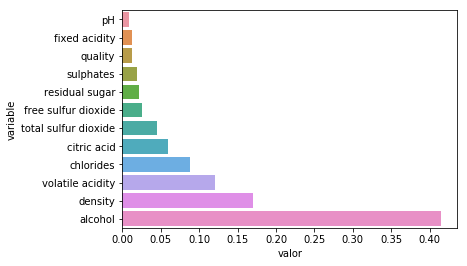

In [0]:
caractRelevantes = pd.DataFrame()
caractRelevantes["variable"] = X_names
caractRelevantes["valor"] = RFC.feature_importances_

sns.barplot(x="valor", y="variable", data=caractRelevantes.sort_values("valor"))
plt.show()